In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('training_mush.csv')
train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [6]:
X = train.drop(columns=['class'])
y = train.loc[:, 'class']

In [5]:
rf = RandomForestClassifier(random_state=0)

In [7]:
params = {
    'n_estimators': range(10, 51, 10), 
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2)
}

grid = GridSearchCV(rf, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [8]:
grid.best_score_

1.0

In [9]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [11]:
grid.cv_results_

{'mean_fit_time': array([0.0440104 , 0.08335201, 0.12336024, 0.14003189, 0.18570876,
        0.0396769 , 0.07835205, 0.11069107, 0.13969739, 0.18237313,
        0.04000974, 0.07401617, 0.10802301, 0.13903165, 0.17303816,
        0.03967627, 0.07068475, 0.10569032, 0.14269876, 0.16870379,
        0.03834279, 0.07568296, 0.10702308, 0.14203143, 0.17437228,
        0.04067564, 0.07101583, 0.10835663, 0.13436206, 0.18103941,
        0.03767506, 0.07668479, 0.10335652, 0.14069827, 0.17337211,
        0.04034273, 0.07301744, 0.10668953, 0.14236418, 0.17443132,
        0.04200919, 0.07461921, 0.10474833, 0.13809029, 0.17037296,
        0.04067667, 0.07034906, 0.10568976, 0.14136545, 0.1733706 ,
        0.04201015, 0.07168245, 0.10635734, 0.14036322, 0.16903734,
        0.03934209, 0.0713501 , 0.10602331, 0.14203183, 0.17170437,
        0.03901037, 0.07168214, 0.10868979, 0.14336514, 0.17170477,
        0.03767435, 0.07135042, 0.10735766, 0.14403192, 0.16958205,
        0.04100808, 0.07268469,

In [12]:
best_rf = grid.best_estimator_

In [26]:
feat = pd.DataFrame(data=list(zip(X.columns, best_rf.feature_importances_)), 
                              columns=['feature', 'score']).sort_values(by='score', ascending=False)
feat

,feature,score
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [28]:
features = list(zip(X.columns, best_rf.feature_importances_))

In [34]:
sorted(features, key=lambda x: x[1], reverse=True)

[('odor', 0.18837641111214493),
 ('gill-color', 0.10386113634342178),
 ('stalk-root', 0.10379322056153273),
 ('spore-print-color', 0.08356418562039068),
 ('gill-spacing', 0.0808401981015132),
 ('ring-type', 0.07072611610317477),
 ('bruises', 0.07010932739225456),
 ('gill-size', 0.06846075644129328),
 ('stalk-surface-below-ring', 0.048295938206773255),
 ('population', 0.04378342634483357),
 ('stalk-surface-above-ring', 0.03180155160638098),
 ('habitat', 0.02261118407986276),
 ('cap-color', 0.021772980463149925),
 ('stalk-color-above-ring', 0.017689316743963592),
 ('ring-number', 0.01391009511831237),
 ('veil-color', 0.010881201035561587),
 ('stalk-shape', 0.0075626188138044285),
 ('stalk-color-below-ring', 0.006253345808705759),
 ('cap-surface', 0.0031295679743042135),
 ('cap-shape', 0.00257742212862182),
 ('gill-attachment', 0.0),
 ('veil-type', 0.0)]

In [35]:
test = pd.read_csv('testing_mush.csv')
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [36]:
predict = best_rf.predict(test)

In [47]:
predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [45]:
y_true = pd.read_csv('testing_y_mush.csv').values.flatten()

In [46]:
y_true

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [52]:
c_m = confusion_matrix(y_true, predict)

<AxesSubplot:>

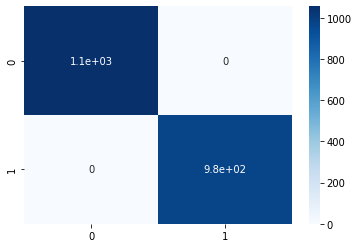

In [53]:
sns.heatmap(c_m, annot=True, cmap="Blues")

## invasion

In [2]:
invasion = pd.read_csv('invasion.csv')
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [3]:
invasion['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [4]:
X = invasion.drop(columns=['class'])
y = invasion.loc[:, 'class']

In [5]:
rf = RandomForestClassifier(random_state=0)
params = {
    'n_estimators': range(10, 51, 10), 
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2)
}

grid = GridSearchCV(rf, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [6]:
grid.cv_results_

{'mean_fit_time': array([0.03500803, 0.06201434, 0.08835498, 0.11035943, 0.13670007,
        0.03400922, 0.064013  , 0.0843509 , 0.11133091, 0.1396691 ,
        0.03067263, 0.05565103, 0.08565799, 0.11135777, 0.13336253,
        0.03034043, 0.05734698, 0.0830183 , 0.11235873, 0.138364  ,
        0.03300842, 0.06101362, 0.08401799, 0.10735774, 0.13136403,
        0.0330081 , 0.05601271, 0.08335169, 0.10935815, 0.13102945,
        0.0296735 , 0.05668004, 0.08201822, 0.11002453, 0.12803014,
        0.03000641, 0.05434601, 0.08068458, 0.10735639, 0.13903062,
        0.02934035, 0.05867918, 0.08735267, 0.11302463, 0.13303049,
        0.02900688, 0.05667837, 0.0900201 , 0.10402274, 0.13503027,
        0.03167343, 0.05601279, 0.08301862, 0.12202819, 0.1400311 ,
        0.03000689, 0.0586795 , 0.07868497, 0.10869225, 0.13836487,
        0.03634254, 0.05401134, 0.07868512, 0.11035879, 0.13703092,
        0.02967342, 0.05801233, 0.08501935, 0.11269339, 0.12869557,
        0.03000697, 0.06068055,

In [8]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [9]:
best_rf = grid.best_estimator_

In [10]:
y_pred = best_rf.predict(X)

In [13]:
c_m = confusion_matrix(y, y_pred)
c_m

array([[ 70,   0,   0],
       [  0, 225,   0],
       [  0,   0, 205]], dtype=int64)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
90,10.055841,6.647843,673.348303,0.129121,40689,12.784287
254,12.377310,5.473882,27.250873,0.173819,476679,10.130464
283,3.183451,9.145453,62.123193,0.449509,546155,46.789384
445,6.615752,8.839067,21.049709,0.187686,28633,12.957528
461,2.494863,6.902252,62.463327,0.576739,432412,39.864733
...,...,...,...,...,...,...
372,8.022418,7.821464,514.660918,0.144563,347947,13.145419
56,11.537133,5.181082,656.754679,0.140635,163411,12.818454
440,1.838253,8.986200,63.127177,0.450200,362695,41.095693
60,3.255493,8.032540,63.505163,0.399112,351908,46.832794


In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [22]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [23]:
best_rf = grid.best_estimator_

In [24]:
y_pred = best_rf.predict(X_train)

In [26]:
c_m = confusion_matrix(y_train, y_pred)
c_m

array([[ 56,   0,   0],
       [  0, 179,   0],
       [  0,   0, 165]], dtype=int64)

In [27]:
y_pred = best_rf.predict(X_test)

In [28]:
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[14,  0,  0],
       [ 0, 46,  0],
       [ 0,  0, 40]], dtype=int64)

In [30]:
operative_information = pd.read_csv('operative_information.csv')
operative_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   g_reflection        1500 non-null   float64
 1   i_reflection        1500 non-null   float64
 2   speed               1500 non-null   float64
 3   brightness          1500 non-null   float64
 4   time_of_observance  1500 non-null   int64  
 5   volume              1500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.4 KB


In [41]:
predict = best_rf.predict(operative_information)
np.unique(predict, return_counts=True)

(array(['cruiser', 'fighter', 'transport'], dtype=object),
 array([230, 675, 595], dtype=int64))

In [42]:
pd.Series(predict).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [45]:
best_rf.feature_importances_, X.columns

(array([0.08875467, 0.12076612, 0.15978428, 0.3631103 , 0.00102433,
        0.26656032]),
 Index(['g_reflection', 'i_reflection', 'speed', 'brightness',
        'time_of_observance', 'volume'],
       dtype='object'))

In [47]:
space = pd.read_csv('space_can_be_a_dangerous_place.csv')
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   r                          100000 non-null  float64
 1   phi                        100000 non-null  float64
 2   peradventure_index         100000 non-null  float64
 3   dustiness                  100000 non-null  float64
 4   black_hole_is_near         100000 non-null  int64  
 5   buggers_were_noticed       100000 non-null  int64  
 6   nearby_system_has_planemo  100000 non-null  int64  
 7   dangerous                  100000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 6.1 MB
